In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [8]:
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [10]:
data.head(20)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


In [11]:
data.columns = data.columns.str.lower()

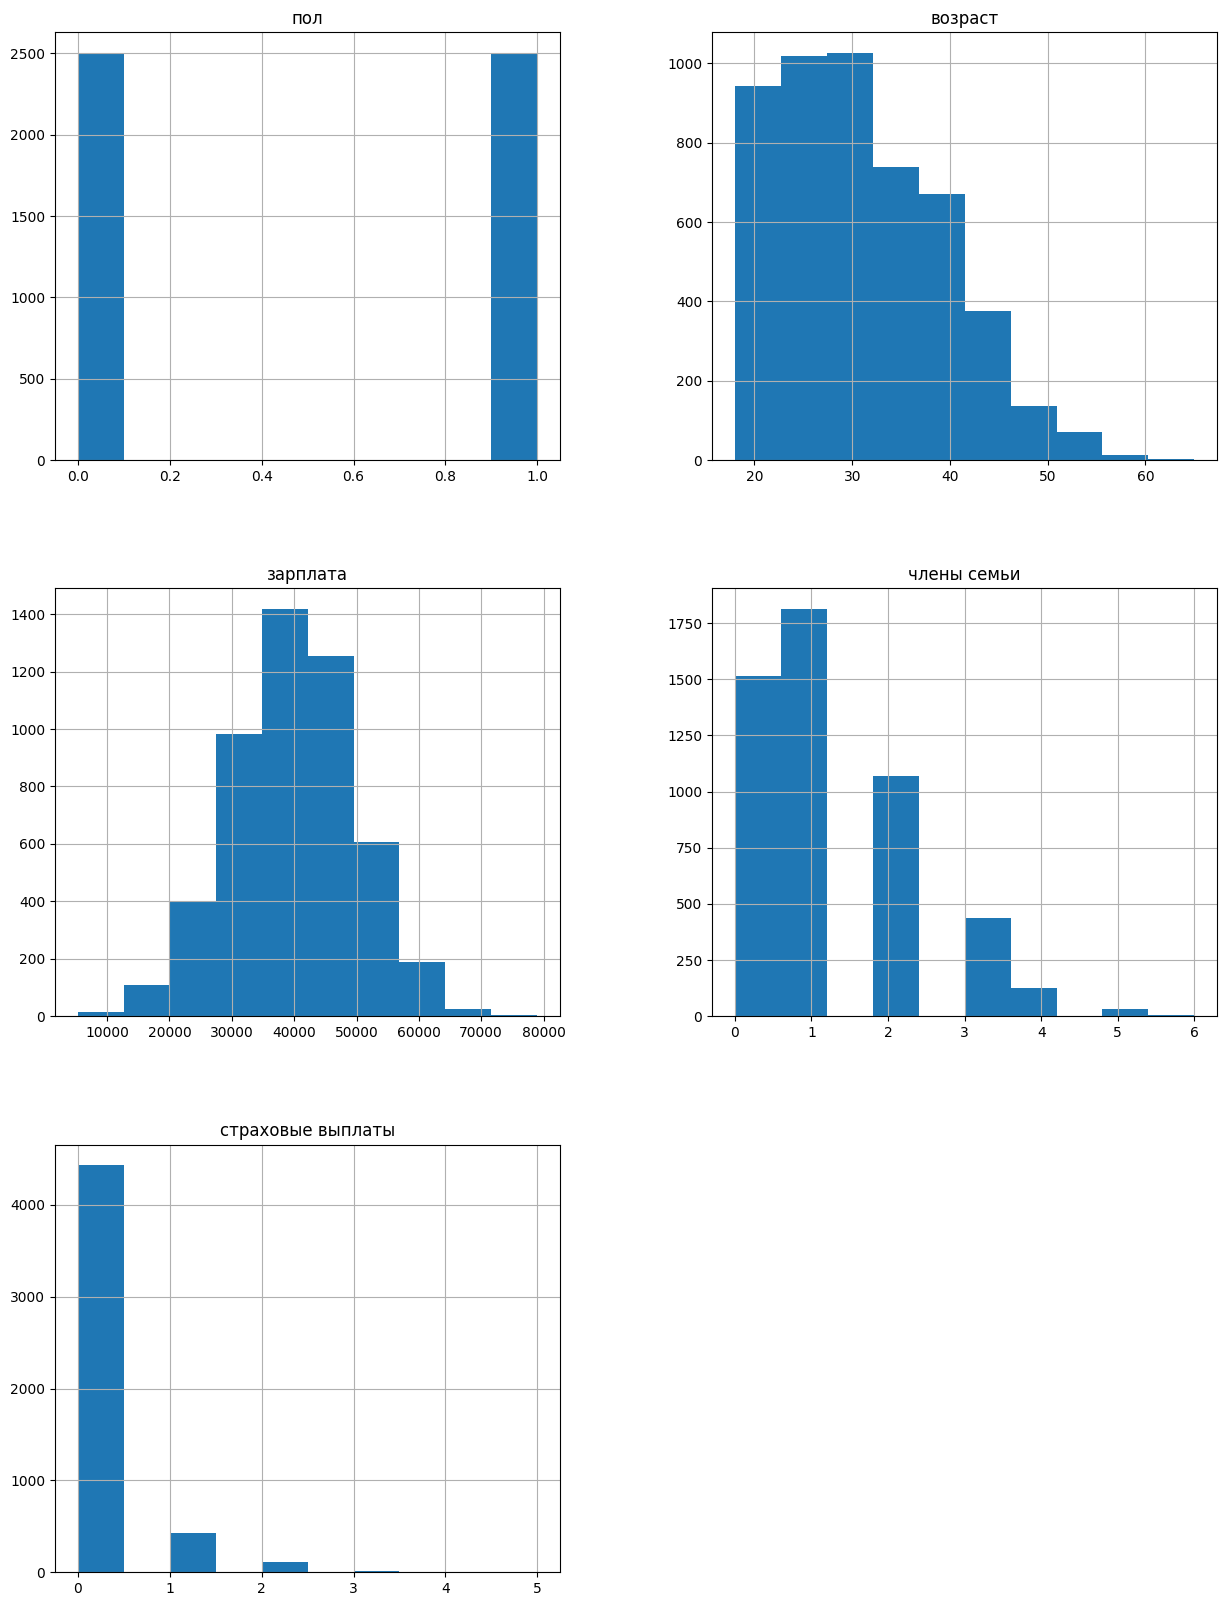

In [12]:
data.hist(figsize = (15, 20));

In [13]:
data['пол'].unique()

array([1, 0])

In [14]:
data['страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4])

In [15]:
data['возраст'].unique()

array([41., 46., 29., 21., 28., 43., 39., 25., 36., 32., 38., 23., 40.,
       34., 26., 42., 27., 33., 47., 30., 19., 31., 22., 20., 24., 18.,
       37., 48., 45., 44., 52., 49., 35., 56., 65., 55., 57., 54., 50.,
       53., 51., 58., 59., 60., 61., 62.])

In [16]:
data['зарплата'].unique()

array([49600., 38000., 21000., 41700., 26100., 41000., 39700., 38600.,
       49700., 51700., 36600., 29300., 39500., 55000., 43700., 23300.,
       48900., 33200., 36900., 43500., 36100., 26600., 48700., 40400.,
       38400., 34600., 34800., 36800., 42200., 46300., 30300., 51000.,
       28100., 64800., 30400., 45300., 38300., 49500., 19400., 40200.,
       31700., 69200., 33100., 31600., 34500., 38700., 39600., 42400.,
       34900., 30500., 24200., 49900., 14300., 47000., 44800., 43800.,
       42700., 35400., 57200., 29600., 37400., 48100., 33700., 61800.,
       39400., 15600., 52600., 37600., 52500., 32700., 51600., 60900.,
       41800., 47400., 26500., 45900., 35700., 34300., 26700., 25700.,
       33300., 31100., 31500., 42100., 37300., 42500., 27300., 46800.,
       33500., 44300., 41600., 53900., 40100., 44600., 45000., 32000.,
       38200., 33000., 38500., 51800., 33800., 46400., 43200., 31800.,
       50200., 35100., 30700., 45800., 49300., 42800., 33600., 50300.,
      

In [17]:
data['возраст'] = data['возраст'].astype(int)
data['зарплата'] = data['зарплата'].astype(int)

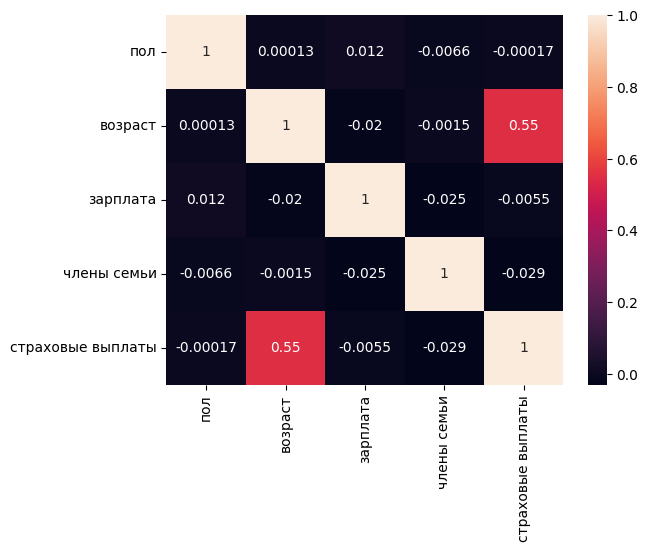

In [18]:
sns.heatmap(data.corr(method = 'spearman'), annot = True);

Пропусков нет, аномальных значений нет, например возраст до 18, 20 детей и т.д. Дубликаты не рассматриваются так как с таким малым количеством данных, совпадения могут быть вполне реальны(например средняя зп 30-40 т.р и двое детей)

## Умножение матриц

**Вопрос:** Изменится ли качество линейной регрессии? Если признаки умножают на обратимую матрицу.

**Варианты ответов:**
 a. Изменится. Привсти примеры матриц.
 b. Не изменится. Указать, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Свойства матриц:

1.А + А0(нулевая матрица) = А

2.А * -1 = -А(противоположная матрица) гле А + -А = А0

3.А * -А = Е(единичная матрица)

4.А * Е = А

5.(А * В)Т = ВТ * АТ

$$
w = (X^T X)^{-1} X^T y
$$
$$
w = ((XP)^TXP)^{-1}*(XP)^Ty
$$
$$
w = ((P^TX^T)*XP)^{-1}(P^TX^T)y
$$
$$
w = (P^T(X^TX)P)^{-1}*(P^TX^T)y
$$
$$
w = P^{-1}*(X^TX)^{-1}*EX^Ty
$$

Сначала рассмотрим формулу обучения, по условию признак умножаем на матрицу Р, раскрываем скобки транспонирования по свойству 5. Перенесоим скобки для удобства по свойству ассоциативности. Транспонированная матрица Р при умножении на обратную трансонированнаую матрицу Р по свойству 3 дает единичную матрицу.

$$
a = Xw
$$
$$
b = XPw
$$
$$
b = X*P*P^{-1}*(X^TX)^{-1}*E*X^T*y
$$
$$
b = X*E*(X^TX)^{-1}*E*X^T*y
$$
$$
b = X*((X^T X)^{-1} X^T y)
$$
при a равном Xw, а w по условию равно ((X^T X)^{-1} X^T y)
$$
a = X*((X^T X)^{-1} X^T y)
$$
$$
a = b
$$

Теперь рассмотрим предсказания. Предсказание а равно w умножить на матрицу X. По условию для нахождения нашего предсказания b умножаем на Р. При подстановке нашего посчитанного значения w, находим умножение матрицы Р на обратную матрицу Р, по свойству 3 получается единичная матрица. Так как умножение матрицы на единичную дает в итоге ту же матрицу, сокращаем Е. Получаем итоговое b. Изначальное предсказание и посчитанное сошлись.

**Ответ:** b. Не изменится.

## Алгоритм преобразования

In [19]:
p = np.random.randint(100,size = (4, 4))
p

array([[22, 91, 43, 41],
       [85, 18, 21, 54],
       [64, 47,  4, 76],
       [32, 41, 85, 47]])

In [20]:
p_inv = np.linalg.inv(p)
p_inv

array([[ 0.00782577,  0.02594257, -0.01672959, -0.00958098],
       [ 0.01788921,  0.00381093, -0.00636489, -0.00969184],
       [-0.00186828,  0.00183138, -0.00810958,  0.01263901],
       [-0.01755486, -0.02429952,  0.03160898,  0.01339662]])

In [21]:
e = p @ p_inv
e

array([[ 1.00000000e+00, -9.71445147e-17,  6.93889390e-18,
         1.04083409e-16],
       [-1.38777878e-17,  1.00000000e+00,  4.16333634e-17,
        -1.52655666e-16],
       [ 1.94289029e-16, -4.99600361e-16,  1.00000000e+00,
        -8.32667268e-17],
       [-9.02056208e-17, -2.35922393e-16, -6.24500451e-17,
         1.00000000e+00]])

In [22]:
features = data.drop('страховые выплаты', axis = 1)
target = data['страховые выплаты']

In [23]:
w = np.linalg.inv(features.T.dot(features)).dot(features.T).dot(target)

In [24]:
a = features @ w

In [25]:
features_new = features @ p

In [26]:
w_new = np.linalg.inv(features_new.T.dot(features_new)).dot(features_new.T).dot(target)

In [27]:
b = features_new @ w_new

In [28]:
a

0       0.282873
1       0.580514
2       0.429481
3      -0.091957
4       0.301713
          ...   
4995    0.142035
4996    0.130942
4997   -0.023457
4998   -0.052559
4999    0.085475
Length: 5000, dtype: float64

In [29]:
b

0       0.282873
1       0.580514
2       0.429481
3      -0.091957
4       0.301713
          ...   
4995    0.142036
4996    0.130942
4997   -0.023456
4998   -0.052559
4999    0.085475
Length: 5000, dtype: float64

In [30]:
c = a - b
c

0      -1.112300e-07
1      -1.545619e-07
2      -7.804663e-08
3      -1.789468e-07
4      -1.204051e-08
            ...     
4995   -1.583948e-07
4996   -2.044350e-07
4997   -1.510751e-07
4998   -7.706697e-08
4999   -7.771647e-08
Length: 5000, dtype: float64

In [31]:
c.sum()

-0.0006022942746906068

**Обоснование**

Сначала создали матрицу для умножения р(она же Р из формул выше)размер 4 на 4 так как 4 признака для предсказания, проверили на обратимость, при умножении изначальной и обратимой получалсь единичная матрица, все верно. Разбили данные на признаки и таргет(цель). Посчитали по формулам обучения и предсказания неизменнные данные, тоже самое с уже преобразованными данными(умножили на матрицу р). Рассмотрели разницу между исходными данными и изменными, сумма крайне мала, все верно.

## Проверка алгоритма

In [32]:
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
r2 = r2_score(target, predictions)
print('R2 без преобразования:', r2)

R2 без преобразования: 0.42494550308169177


In [33]:
model = LinearRegression()
model.fit(features_new, target)
predictions = model.predict(features_new)
r2 = r2_score(target, predictions)
print('R2 без преобразования:', r2)

R2 без преобразования: 0.42494550308168755


R2_score и обеих моделей почти одинаков, разница несущественна, значит алгоритм преобразования верен. При умножении признаков на обратимую матрицу данные шифруются, но качество модели не менятся.


## Дополнительное шифрование

In [34]:
scaler = MinMaxScaler()
scaler.fit(features)
features_scaled = scaler.transform(features)

In [35]:
features_scaled

array([[1.        , 0.4893617 , 0.60108548, 0.16666667],
       [0.        , 0.59574468, 0.44369064, 0.16666667],
       [0.        , 0.23404255, 0.21302578, 0.        ],
       ...,
       [0.        , 0.04255319, 0.3880597 , 0.33333333],
       [1.        , 0.08510638, 0.37177748, 0.5       ],
       [1.        , 0.21276596, 0.47896879, 0.16666667]])

In [36]:
model = LinearRegression()
model.fit(features_scaled, target)
predictions = model.predict(features_scaled)
r2 = r2_score(target, predictions)
print('R2 без преобразования:', r2)

R2 без преобразования: 0.42494550308169177


R2_score все тот же, но изначальные данные потеряли смысл при чтении

Так как скалирование данным методом происходит по формуле 𝑋′=𝑎+((𝑋−𝑋𝑚𝑖𝑛)/(𝑋𝑚𝑎𝑥−𝑋𝑚𝑖𝑛))∗(𝑏−𝑎) для производльного диапазона [a, b], мы используем стандартный диапазон (0,1).

Считаю, если перебрать все строки, восстановить данные несколько трудно так как в уравнении 3 неизвестных.

## Вывод

Рассмотрели методы преобразования/шифрования данных, но при этом качество модели не упало.

Можно использовать, при модели линейной регрессии, операции с матрицами, конкретно умножение матрицы признаков на обратимую случайную матрицу либо масштабирование данных.
